## Can housing age possibly be a factor in how severe the fire is or even be the cause of why a  fire happens. 
* For instance old applicances, old electric, bad fire preventions or other things might be the cause
* We look at when houses are built and see if there is correlation with older houses and fire incidents
* When only looking at the fire incidents, can we see correlation with borough that have old houses ?

### Data used

For the purpose of the housing investigation data was collected for:
- Convertion numbers of lsoa and
- Ages of houses
- The incident dataset is then enriched with those datapoints

In [11]:
# read in the data 
# Import necessary libraries and apply settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import Image
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

file = 'House_Ages/tables/E37000023.csv'
file2 = '2011_OA-LSOA-MSOA-LA.csv'
df = pd.read_csv(file, encoding='iso-8859-1')
df_convert = pd.read_csv(file2, encoding='us-ascii')

In [12]:
# Load the previously cleaned dataset
incidents = pd.read_csv('fire_incidents2020.csv')#pd.read_csv('fire_incidents1year.csv')
incidents = incidents.append(pd.read_csv('fire_incidents2019.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2018.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2017.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2016.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2015.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2014.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2013.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2012.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2011.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2010.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2009.csv'));

/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,25,52,83) have mixed types.Specify dtype option o

## Data prep

Now we are only interested in the cases of fire since we are going to look at the relation to house age and different aspect of the fire, such as: Count, Severity (cost) and more.

In [64]:
incidents_fire = incidents[incidents.IncidentGroup == 'Fire']
select_columns = ['IncGeo_BoroughName','IncidentGroup','StopCodeDescription','PropertyCategory',
                  'IncGeo_BoroughCode','WardCode','Notional Cost (£)',
                  'LSOA Code','MSOA Code']
incidents_fire = incidents_fire[select_columns]

In [65]:
print("Rows of data: ", len(incidents_fire))
incidents_fire.isnull().sum()

Rows of data:  248107


IncGeo_BoroughName          0
IncidentGroup               0
StopCodeDescription         0
PropertyCategory            0
IncGeo_BoroughCode          0
WardCode                    0
Notional Cost (£)      188396
LSOA Code               72495
MSOA Code               72495
dtype: int64

The detail of the dataset is on the lsoa11cd code, this is reasonably specific location and even though the incidents dataset will loose 33% of the lines if that code is set as a condition, it will in the end provide more accurate results. It is also needed to have the notional cost for comparing so all row not containing the cost will be saved to new dataframe for those examinations.

In [66]:
# remove lines that dont have LSOA code
incidents_fire = incidents_fire[incidents_fire['LSOA Code'].notna()]
incidents_fire_cost = incidents_fire[incidents_fire['Notional Cost (£)'].notna()]
print("Rows of fire data: ", len(incidents_fire))
print("Rows of cost data: ", len(incidents_fire_cost))
incidents_fire.isnull().sum()

Rows of fire data:  175612
Rows of cost data:  41475


IncGeo_BoroughName          0
IncidentGroup               0
StopCodeDescription         0
PropertyCategory            0
IncGeo_BoroughCode          0
WardCode                    0
Notional Cost (£)      134137
LSOA Code                   0
MSOA Code                   0
dtype: int64

We are left with roughly 41 thousand lines for the cost comparison and 175 thousand for other analysis purposes.

In [67]:
# Add the borough code from lsoa11cd values 
df["BoroughCode"] = [df_convert[df_convert.LSOA11CD == x].iloc[1,:]["LAD11CD"] for x in df.lsoa11cd]
df['BoroughName'] = [df_convert[df_convert.LSOA11CD == x].iloc[1,:]["LAD11NM"] for x in df.lsoa11cd]

In [19]:
df.head()

,lsoa11cd,lsoa11nm,BP_PRE_1900,BP_1900_1918,BP_1919_1929,BP_1930_1939,BP_1945_1954,BP_1955_1964,BP_1965_1972,BP_1973_1982,...,ALL_PROPERTIES,MODE1_VAL,MODE1_TYPE,MODE1_PC,MODE2_VAL,MODE2_TYPE,MODE2_PC,MODE2_MODE1_RATIO,BoroughCode,BoroughName
0,E01000001,City of London 001A,60,1,0,0,0,50,840,10,...,1100,840,BP_1965_1972,0.76,80,BP_2000_2009,0.07,0.10,E09000001,City of London
1,E01000002,City of London 001B,10,0,0,0,0,70,910,1,...,1190,910,BP_1965_1972,0.76,200,BP_2010_2015,0.17,0.22,E09000001,City of London
2,E01000003,City of London 001C,20,0,0,0,0,20,780,1,...,910,780,BP_1965_1972,0.86,60,BP_1993_1999,0.07,0.08,E09000001,City of London
3,E01000005,City of London 001E,90,1,1,20,1,140,110,170,...,680,170,BP_1973_1982,0.25,140,BP_1955_1964,0.21,0.82,E09000001,City of London
4,E01000006,Barking and Dagenham 016A,40,20,170,140,30,0,0,0,...,530,170,BP_1919_1929,0.32,140,BP_1930_1939,0.26,0.82,E09000002,Barking and Dagenham


This plot shows the distribution of when the houses are built

In [50]:
# select the stats 
select_columns = ['lsoa11cd','BP_PRE_1900', 'BP_1900_1918', 'BP_1919_1929',
               'BP_1930_1939', 'BP_1945_1954', 'BP_1955_1964', 'BP_1965_1972',
               'BP_1973_1982', 'BP_1983_1992', 'BP_1993_1999', 'BP_2000_2009',
               'BP_2010_2015','BoroughName']
df_selected = df[select_columns]
df_selected = df_selected.groupby("BoroughName").sum().reset_index()
df_selected.head()

,BoroughName,BP_PRE_1900,BP_1900_1918,BP_1919_1929,BP_1930_1939,BP_1945_1954,BP_1955_1964,BP_1965_1972,BP_1973_1982,BP_1983_1992,BP_1993_1999,BP_2000_2009,BP_2010_2015
0,Barking and Dagenham,917,2313,28678,12072,6710,4486,4755,1772,1774,2755,4727,2499
1,Barnet,10327,21612,20150,33970,7055,8016,8621,7328,8811,5787,7621,4845
2,Bexley,6570,4001,3932,37592,6181,9907,6953,7302,5670,3458,2446,2065
3,Brent,26712,10336,14116,28333,3327,3078,4102,4134,4541,3921,8245,4277
4,Bromley,16868,7006,6049,36886,12165,13144,13060,11399,8022,2951,6416,3115


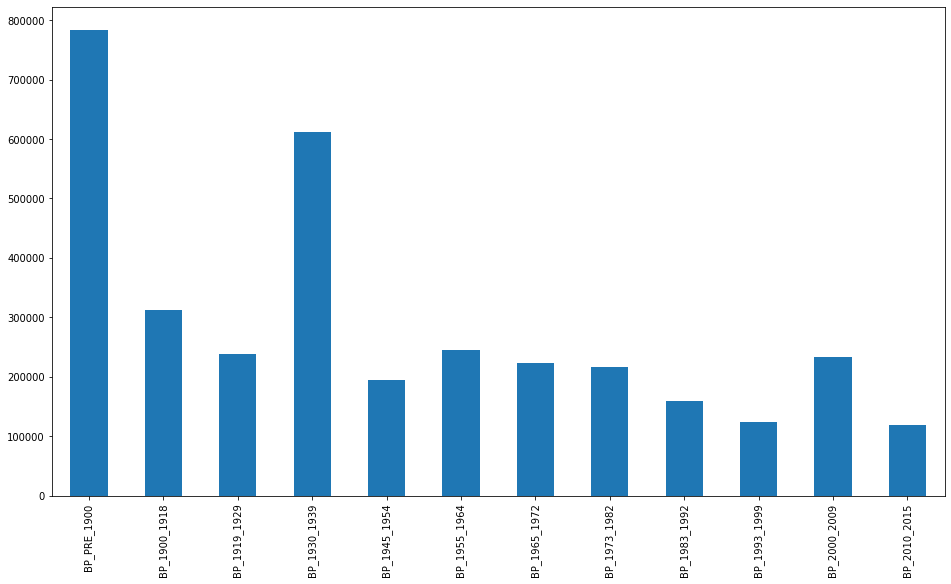

In [51]:
df_selected.iloc[: , 1:].sum().plot(kind='bar')

Now we group together the years to get the average age, those houses built before 1900 are not considers in the average but rather considers as a seperate attripute for comparions.

In [91]:
# df_selected = df_selected.drop(['AVG_age_after_1900'],axis=1)
# df_selected = df_selected.drop(['newname'],axis=1)
# df_selected = df_selected.drop(['total'],axis=1)
multiplier = [1910,1925,1935,1949,1959,1968,1978,1988,1996,2005,2012.5]
# df_selected["AvgAge_P_1900"] = []
columns = list(df_selected.columns)[2:]

df_selected['newname'] = 0
df_selected['total'] = 0
for i,c in enumerate(columns):
    df_selected['newname'] = df_selected['newname'] + df_selected[c]*multiplier[i]
    df_selected['total'] = df_selected['total'] + df_selected[c]

df_selected["AVG_age_after_1900"] = df_selected['newname'] / df_selected['total']
# for i in range(len(df_selected)):
#   df_selected.iloc[2:,i]
# df_selected["total"] = df_selected.iloc[,].sum()
# df_selected.head()

# df_selected.BP_1900_1918*multiplier[0] + ...
df_selected = df_selected.drop(['newname'],axis=1)
df_selected = df_selected.drop(['total'],axis=1)

df_selected.head(20)

,BoroughName,BP_PRE_1900,BP_1900_1918,BP_1919_1929,BP_1930_1939,BP_1945_1954,BP_1955_1964,BP_1965_1972,BP_1973_1982,BP_1983_1992,BP_1993_1999,BP_2000_2009,BP_2010_2015,AVG_age_after_1900
0,Barking and Dagenham,917,2313,28678,12072,6710,4486,4755,1772,1774,2755,4727,2499,1947.086262
1,Barnet,10327,21612,20150,33970,7055,8016,8621,7328,8811,5787,7621,4845,1949.033438
2,Bexley,6570,4001,3932,37592,6181,9907,6953,7302,5670,3458,2446,2065,1952.552789
3,Brent,26712,10336,14116,28333,3327,3078,4102,4134,4541,3921,8245,4277,1951.089690
4,Bromley,16868,7006,6049,36886,12165,13144,13060,11399,8022,2951,6416,3115,1955.521678
5,Camden,50330,3962,2812,6919,3698,7645,7732,7565,3063,3275,5506,2844,1965.106269
6,City of London,1410,82,51,60,151,340,2651,293,100,460,670,410,1976.729499
7,Croydon,30517,15269,10141,29253,6639,14802,11543,10041,6828,4021,6939,3534,1953.019671
8,Ealing,18110,22906,10314,33749,5305,6271,7033,8845,5865,3285,6560,4001,1947.633532
9,Enfield,13375,15992,8901,36093,5559,8151,8231,6178,5916,5514,7394,2013,1949.966132


In [98]:
df_selected.head()

,BoroughName,BP_PRE_1900,BP_1900_1918,BP_1919_1929,BP_1930_1939,BP_1945_1954,BP_1955_1964,BP_1965_1972,BP_1973_1982,BP_1983_1992,BP_1993_1999,BP_2000_2009,BP_2010_2015,AVG_age_after_1900
0,Barking and Dagenham,917,2313,28678,12072,6710,4486,4755,1772,1774,2755,4727,2499,1947.086262
1,Barnet,10327,21612,20150,33970,7055,8016,8621,7328,8811,5787,7621,4845,1949.033438
2,Bexley,6570,4001,3932,37592,6181,9907,6953,7302,5670,3458,2446,2065,1952.552789
3,Brent,26712,10336,14116,28333,3327,3078,4102,4134,4541,3921,8245,4277,1951.089690
4,Bromley,16868,7006,6049,36886,12165,13144,13060,11399,8022,2951,6416,3115,1955.521678


In [97]:
# lets only select the buildings 
building_types = ['Dwelling','Outdoor Structure','Other Residential']
incidents_fire = incidents_fire[incidents_fire.IncGeo_BoroughName != ' NOT GEO-CODED']

# filter the building types
incidents_fire = incidents_fire[incidents_fire.PropertyCategory.isin(building_types)]
df_grouped = incidents_fire.groupby('IncGeo_BoroughName')['IncidentGroup'].count().reset_index(name='Count')

In [ ]:
# Create a bombined dataframe 
df_merged = pd.concat([incidents_fire[['IncGeo_BoroughName','']], df4.reindex(df1.index)], axis=1)

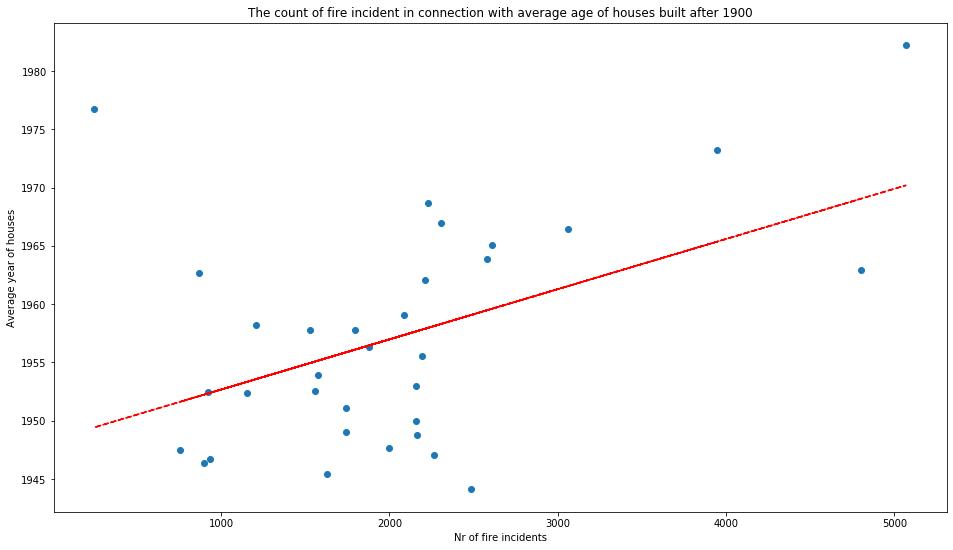

In [108]:
# df_selected[['Houshold_Median_Income','Median_House_Price,_2015']].plot.bar(figsize=(16,9), secondary_y= 'Median_House_Price,_2015')

# ax1, ax2 = plt.gcf().get_axes(); # gets the current figure and then the axes
# ax1.set_ylabel('Income');
# ax2.set_ylabel('House Price');

plt.scatter(df_grouped.Count,df_selected.AVG_age_after_1900);

z = np.polyfit(df_grouped.Count, df_selected.AVG_age_after_1900, 1)
p = np.poly1d(z)
plt.plot(df_grouped.Count,p(df_grouped.Count),"r--")

plt.title("The count of fire incident in connection with average age of houses built after 1900")
plt.xlabel("Nr of fire incidents");
plt.ylabel("Average year of houses");

There seems to be a trend with the count of fires and the average ages of all houses built after 1900

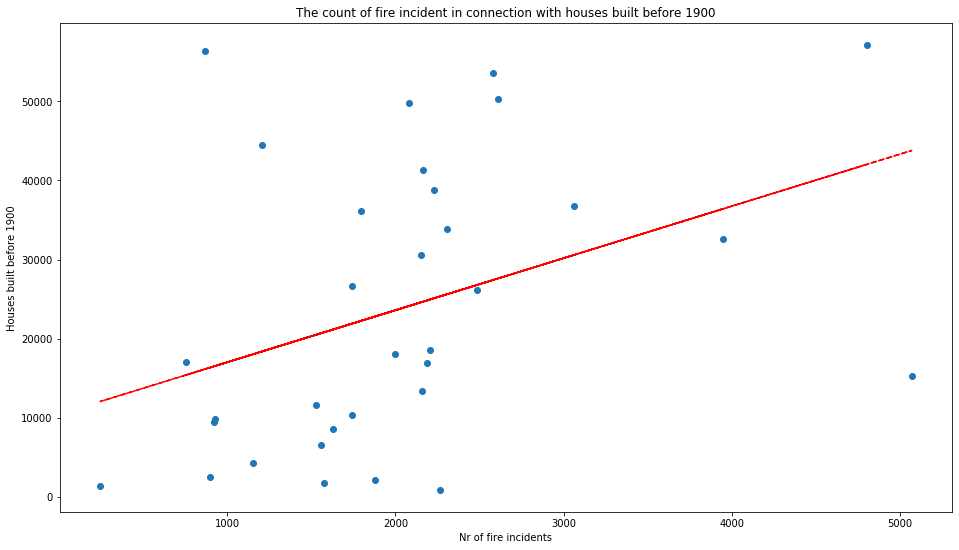

In [109]:
# Houses built before 1900
plt.scatter(df_grouped.Count,df_selected.BP_PRE_1900);
z = np.polyfit(df_grouped.Count, df_selected.BP_PRE_1900, 1)
p = np.poly1d(z)
plt.plot(df_grouped.Count,p(df_grouped.Count),"r--")

plt.title("The count of fire incident in connection with houses built before 1900")
plt.xlabel("Nr of fire incidents");
plt.ylabel("Houses built before 1900");

There is again indication here, that the count of houses built before 1900 have a say in how many fires happen